In [1]:
%matplotlib inline
import pandas as pd
import pylab
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

import random
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.spatial.distance as ssd
from sklearn.ensemble import RandomForestClassifier
import sklearn

In [2]:
obs = pd.read_csv('C:/Users/Max/Downloads/data/training_set.csv')
meta = pd.read_csv('C:/Users/Max/Downloads/data/training_set_metadata.csv')

In [11]:
meta['last_row']=0

In [32]:
start=0
meta_index=0
previous_id=0
rows_read=0
for chunk in pd.read_csv('C:/Users/Max/Downloads/data/training_set.csv', chunksize=10000):
    for index, row in chunk.iterrows():
        if row['object_id']!=previous_id and start!=0:
            meta.loc[meta_index,'last_row'] = index-1+rows_read
            meta_index += 1
        previous_id=row['object_id']
        start=1    


In [50]:

meta.loc[meta.index[-1],'last_row']=obs.shape[0]


In [ ]:
t0 = time()
obs=pd.read_csv('keywords.list', sep='\t', skiprows=60,nrows=75436)
t1 = time()
print('function vers1 takes %f' %(t1-t0))

In [57]:
from time import time 
t0 = time()
pd.read_csv('C:/Users/Max/Downloads/data/training_set.csv')
t1 = time()
print('function vers1 takes %f' %(t1-t0))

function vers1 takes 1.531333


In [85]:
from time import time 
t0 = time()
pd.read_csv('C:/Users/Max/Downloads/data/training_set.csv',skiprows=10000,nrows=40000)
t1 = time()
print('function vers1 takes %f' %(t1-t0))

function vers1 takes 0.062506


In [137]:

df2=obs.groupby(['object_id','passband']).max()
df2['band']=df2.index.get_level_values(1)
df2.band="max_band_"+df2.band
df2

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U21') dtype('<U21') dtype('<U21')

In [117]:
t0 = time()
start=0
end=0
meta['1_max']=0
for i_start in range(-1,7999,1000):
    i_end=max(i_start+1000,meta.shape[0])
    if i_start=-1:
        start=1
    else:
        start=meta.loc[i_start,'last_row']
    end=meta.loc[i_end'last_row']
    df=pd.read_csv('C:/Users/Max/Downloads/data/training_set.csv',skiprows=range(1, int(start)+2),nrows=int(end-start))
    start=end
    df2=df.groupby(['object_id','passband'])
    
    
    t1 = time()
    print('function vers1 takes %f' %(t1-t0))


function vers1 takes 0.062506
function vers1 takes 51.080657
function vers1 takes 195.134675
function vers1 takes 402.332458


KeyboardInterrupt: 

In [116]:
meta

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,last_row,1_max
0,615.0,349.046051,-61.943836,320.796530,-51.753706,1.0,0.0000,0.0000,0.0000,NaN,0.017,92.0,351.0,660.626343
1,713.0,53.085938,-27.784405,223.525509,-54.460748,1.0,1.8181,1.6267,0.2552,45.4063,0.007,88.0,701.0,9.129021
2,730.0,33.574219,-6.579593,170.455585,-61.548219,1.0,0.2320,0.2262,0.0157,40.2561,0.021,42.0,1031.0,5.693109
3,745.0,0.189873,-45.586655,328.254458,-68.969298,1.0,0.3037,0.2813,1.1523,40.7951,0.007,90.0,1382.0,192.244293
4,1124.0,352.711273,-63.823658,316.922299,-51.059403,1.0,0.1934,0.2415,0.0176,40.4166,0.024,90.0,1734.0,37.170177
5,1227.0,35.683594,-5.379379,171.992947,-59.253501,1.0,0.0000,0.0000,0.0000,NaN,0.020,65.0,2064.0,8.092285
6,1598.0,347.846710,-64.760857,318.929827,-49.143596,1.0,0.1352,0.1820,0.0304,39.7279,0.019,90.0,2416.0,1448.715698
7,1632.0,348.595886,-63.072620,320.023289,-50.713060,1.0,0.6857,0.7014,0.0100,43.1524,0.021,42.0,2768.0,5.108418
8,1920.0,149.414062,3.433834,234.919132,42.245550,1.0,0.3088,0.3229,0.3360,41.1401,0.027,90.0,3023.0,195.064560
9,1926.0,149.414062,1.940072,236.565366,41.393323,1.0,0.0000,0.0000,0.0000,NaN,0.018,65.0,3278.0,3.309005


In [4]:
def timeplot(band,id):
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(obs.mjd[(obs.passband==band)&(obs.object_id==id)],obs.flux[(obs.passband==band)&(obs.object_id==id)])

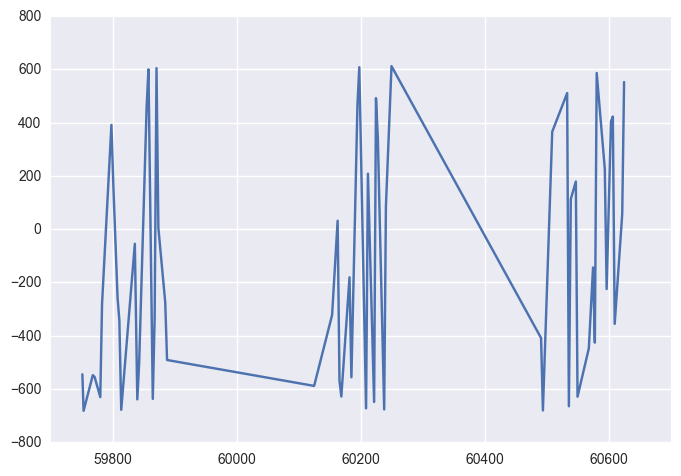

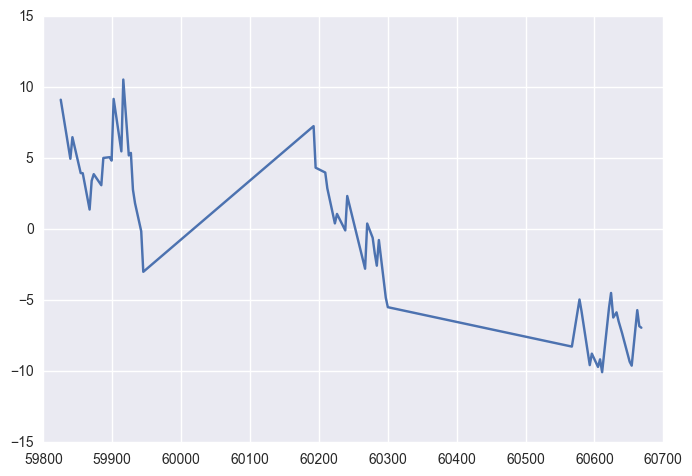

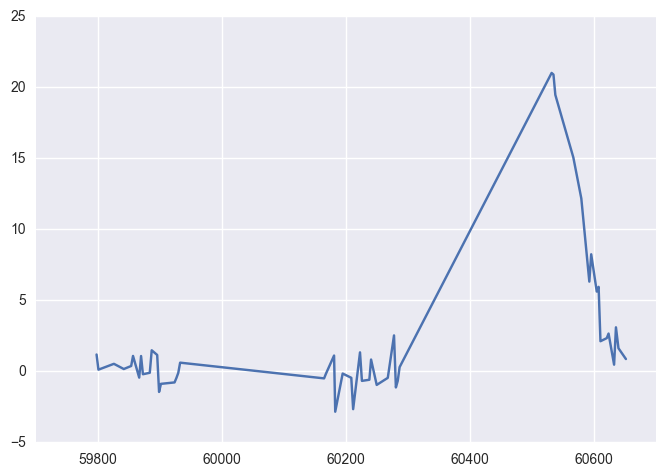

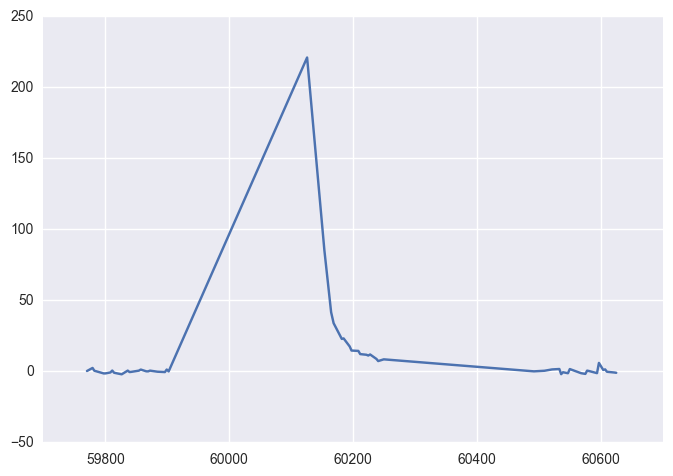

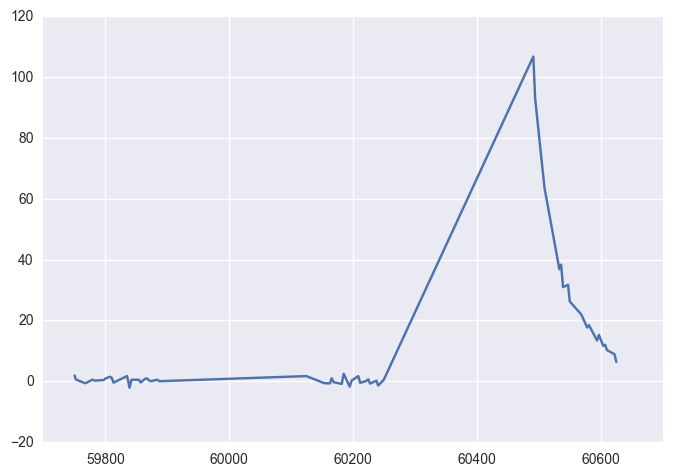

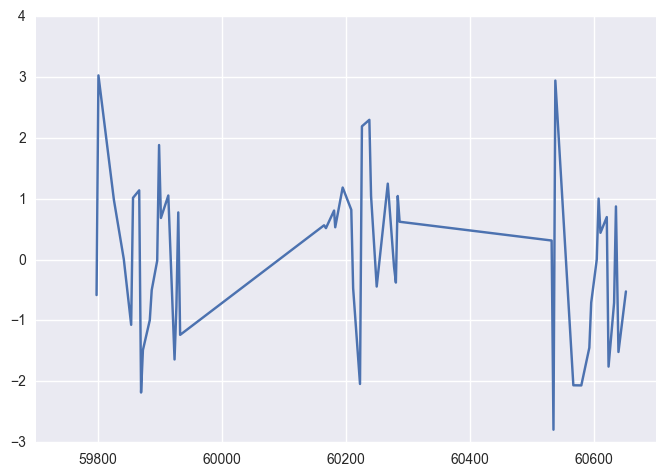

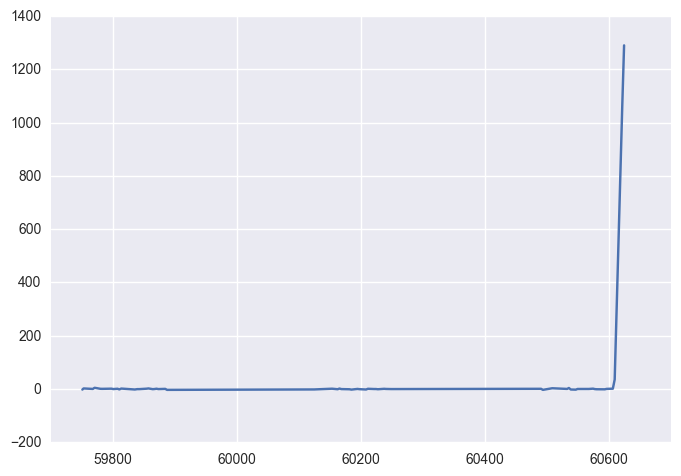

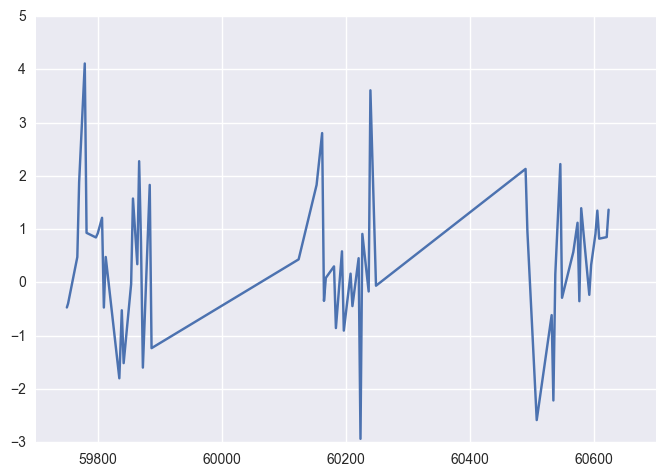

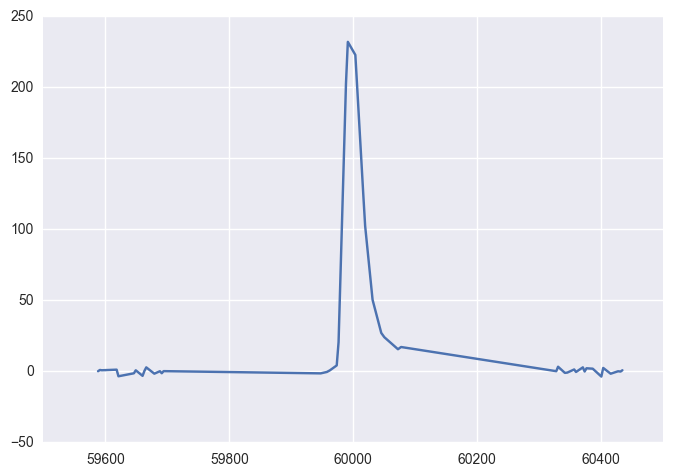

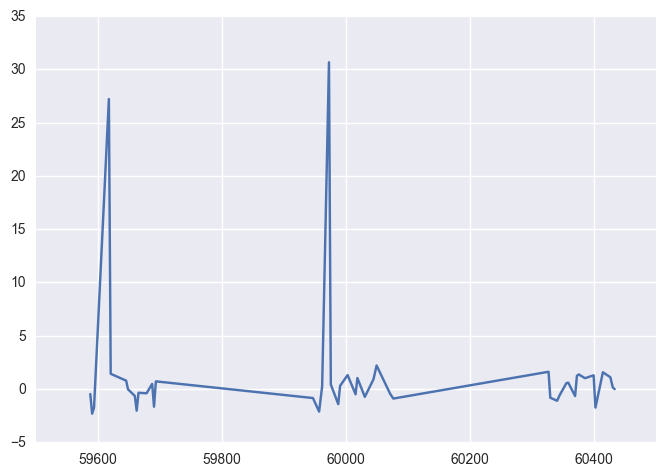

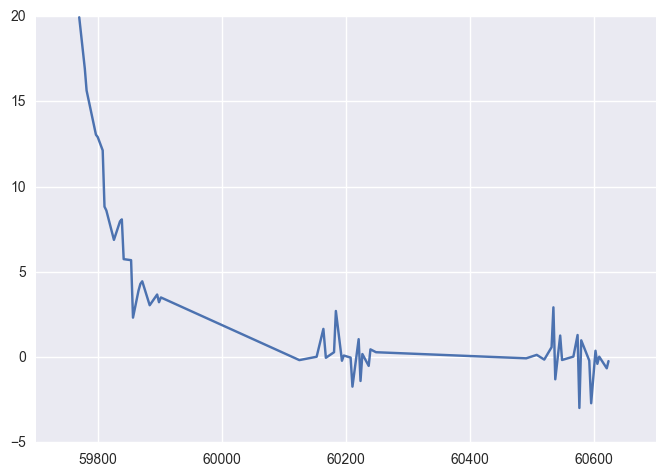

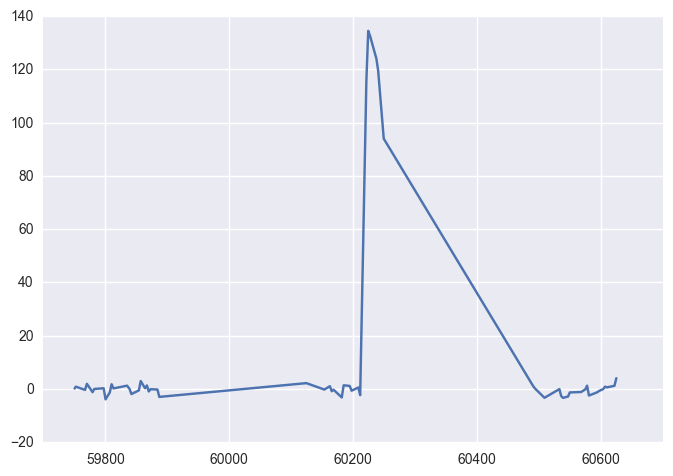

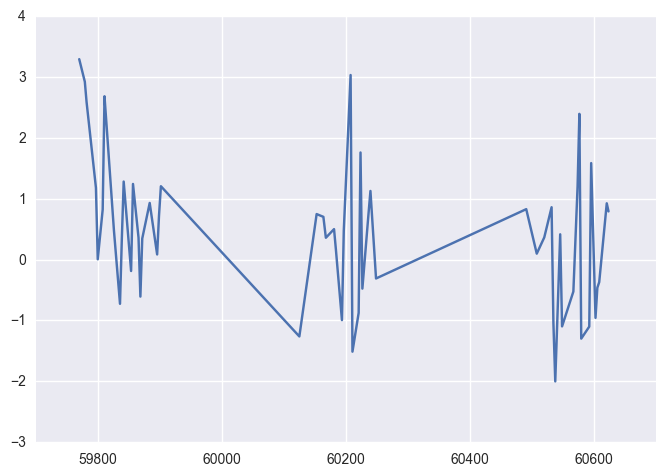

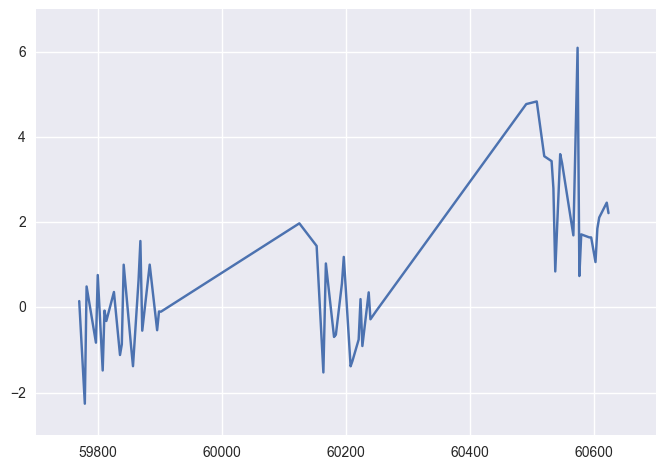

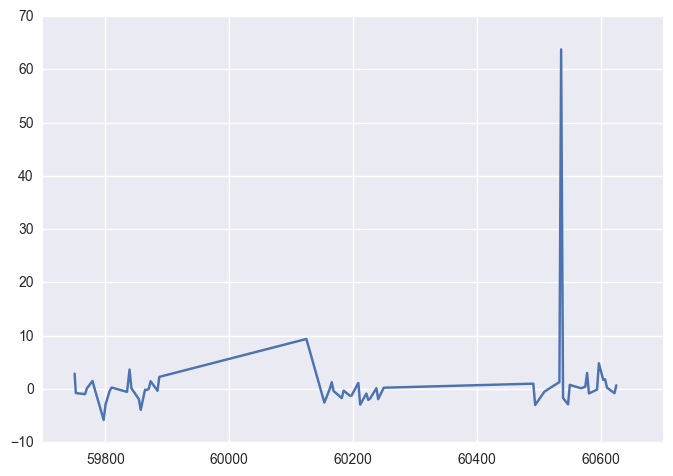

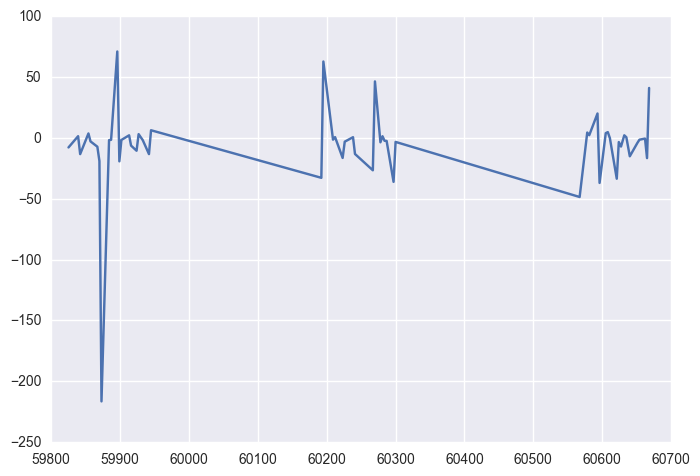

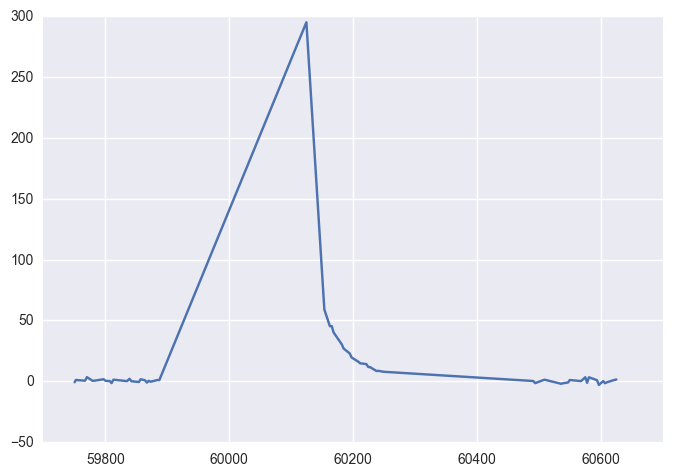

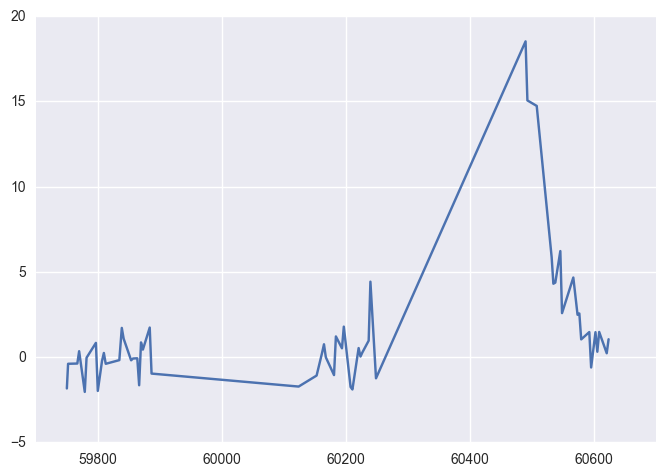

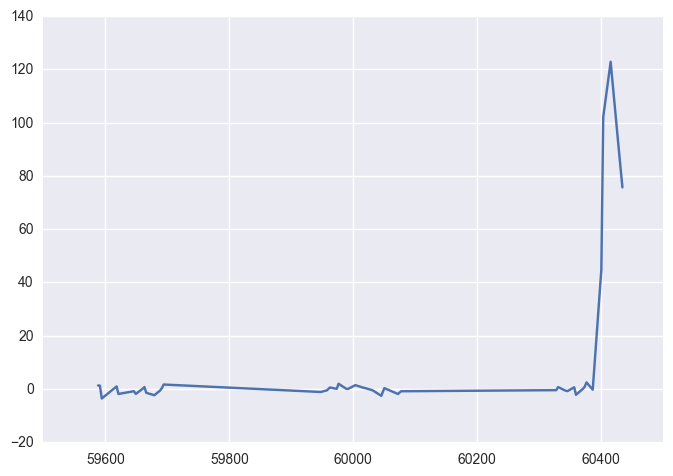

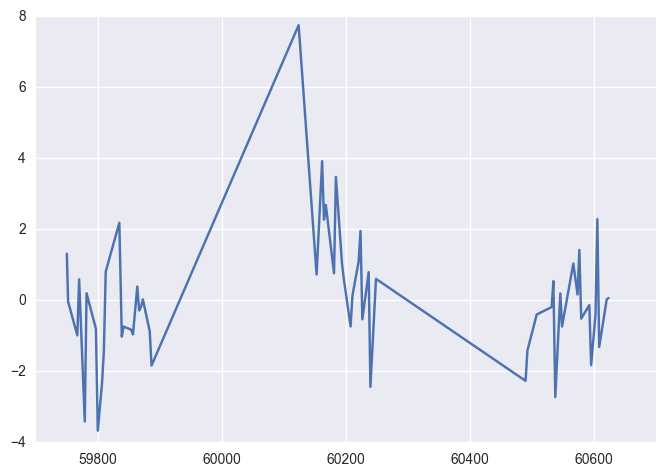

In [5]:
for i in range(20):
    timeplot(2,obs.object_id.unique()[i])

In [6]:
       """     x=obs.mjd[(obs.passband==2)&(obs.object_id==obs.object_id.unique()[5])]
            y=obs.mjd[(obs.passband==2)&(obs.object_id==obs.object_id.unique()[1])]
            distance, path = fastdtw(x, y, dist=euclidean)
            dist_m[i][j]=distance
            print(distance)
dist_m[5][1]"""

'     x=obs.mjd[(obs.passband==2)&(obs.object_id==obs.object_id.unique()[5])]\n     y=obs.mjd[(obs.passband==2)&(obs.object_id==obs.object_id.unique()[1])]\n     distance, path = fastdtw(x, y, dist=euclidean)\n     dist_m[i][j]=distance\n     print(distance)\ndist_m[5][1]'

In [7]:
def dtw_m(num):
    dist_m=np.zeros((num,num))
    for i in range(num):
        x=obs.flux[(obs.passband==2)&(obs.object_id==obs.object_id.unique()[i])]
        for j in range(num):
            if i!=j:
                y=obs.flux[(obs.passband==2)&(obs.object_id==obs.object_id.unique()[j])]
                distance, path = fastdtw(x, y, dist=euclidean)
                dist_m[i][j]=distance
    return dist_m
            


In [9]:
from time import time
t0 = time()
dist_m=dtw_m(20)    
distArray = ssd.squareform(dist_m)

z=linkage(distArray)
labels = sci.cluster.hierarchy.fcluster(z, 3, criterion='maxclust')

t1 = time()
print('function vers1 takes %f' %(t1-t0))

function vers1 takes 31.782825


In [10]:
meta.target.unique()

array([92, 88, 42, 90, 65, 16, 67, 95, 62, 15, 52,  6, 64, 53], dtype=int64)

In [32]:
t0 = time()
test=meta.object_id.sample(n=200)
obs_test=obs[obs.object_id.isin(list(test))]
meta_test=meta[meta.object_id.isin(list(test))]
full_test=obs_test.merge(meta_test,on="object_id")
full_x=full_test.drop(["target","distmod"],axis=1)
full_y=full_test["target"]

train_index=meta.object_id.sample(n=100)
obs_train=obs[obs.object_id.isin(list(train_index))]
meta_train=meta[meta.object_id.isin(list(train_index))]
full_train=obs_train.merge(meta_train,on="object_id")
full_x_train=full_train.drop(["target","distmod"],axis=1)
full_y_train=full_train["target"]

clf=RandomForestClassifier(n_estimators=80 ,min_samples_leaf=22)

clf.fit(full_x,full_y)
pred=clf.predict_proba(full_x)


t1 = time()
print('function vers1 takes %f' %(t1-t0))

function vers1 takes 3.859568


In [38]:
dataset = pd.DataFrame({'object_id':full_x.object_id,
                        'Class_6':pred[:,0],
                        'Class_15':pred[:,1],
                        'Class_16':pred[:,2],
                        'Class_42':pred[:,3],
                        'Class_52':pred[:,4],
                        'Class_62':pred[:,5],
                        'Class_64':pred[:,6],
                        'Class_65':pred[:,7],
                        'Class_67':pred[:,8],
                        'Class_88':pred[:,9],
                        'Class_90':pred[:,10],
                        'Class_92':pred[:,11],
                        'Class_95':pred[:,12],                        
                       })
dataset['class_99']=0


In [46]:
output=pd.DataFrame({'object_id':meta.object_id})
output['class_6']=0
output['class_15']=0
output['class_16']=0
output['class_42']=0
output['class_52']=0
output['class_62']=0
output['class_64']=0
output['class_65']=0
output['class_67']=0
output['class_88']=0
output['class_90']=0
output['class_92']=0
output['class_95']=0


In [23]:
from sklearn.model_selection import KFold
df2 = pd.DataFrame(np.zeros((10,10)) )  
t0 = time()
test=meta.object_id.sample(n=150)
obs_test=obs[obs.object_id.isin(list(test))]
meta_test=meta[meta.object_id.isin(list(test))]
full_test=obs_test.merge(meta_test,on="object_id")
full_x=full_test.drop(["target","distmod"],axis=1)
full_y=full_test["target"]
for i in range(1):
    for k in range(10):
        result=0
        
        
        kf = KFold(n_splits=6)
        for train_index, test_index in kf.split(full_x):
           
            x_train, x_test = full_x.iloc[train_index], full_x.iloc[test_index]
            y_train, y_test = full_y.iloc[train_index], full_y.iloc[test_index]
           

            clf = RandomForestClassifier(n_estimators=60 ,min_samples_leaf=(k*5)+1)
            
            
            clf.fit(x_train,y_train)
            
            #ans=clf.predict(x_test)
            
            result+=clf.score(x_test,y_test)
            #print(sklearn.metrics.r2_score(y_test,ans))
            #print(neigh.score(X_test,y_test),"  ",end="")
        # print("pa",i)
        # print(k_val)
        #print(np.average(result))
        #print(result)
        df2.ix[i,k]=result/(6)
    
    print("BREAK")
print(df2)

t1 = time()
print('function vers1 takes %f' %(t1-t0))

BREAK
          0         1         2         3         4         5         6  \
0  0.488869  0.537524  0.517816  0.479824  0.536829  0.539069  0.512789   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9  
0  0.534624  0.535709  0.514569  
1  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.000000  
3  0.000000  0.000000  0.000000 

In [28]:
from sklearn.model_selection import KFold
df2 = pd.DataFrame(np.zeros((10,10)) )  
t0 = time()

for i in range(1):
    for k in range(10):
        result=0
        
        
        
        for j in range(6):
            test_index=meta.object_id.sample(n=300)
            train_index=meta.object_id.sample(n=100)
            
            obs_test=obs[obs.object_id.isin(list(test_index))]
            meta_test=meta[meta.object_id.isin(list(test_index))]
            full_test=obs_test.merge(meta_test,on="object_id")
            full_x=full_test.drop(["target","distmod"],axis=1)
            full_y=full_test["target"]
            
            obs_train=obs[obs.object_id.isin(list(train_index))]
            meta_train=meta[meta.object_id.isin(list(train_index))]
            full_train=obs_train.merge(meta_train,on="object_id")
            full_x_train=full_train.drop(["target","distmod"],axis=1)
            full_y_train=full_train["target"]
            clf = RandomForestClassifier(n_estimators=70 ,min_samples_leaf=(k*8)+1)
            
            
            clf.fit(full_x,full_y)
            
            #ans=clf.predict(x_test)
            
            result+=clf.score(full_x_train,full_y_train)
            #print(sklearn.metrics.r2_score(y_test,ans))
            #print(neigh.score(X_test,y_test),"  ",end="")
        # print("pa",i)
        # print(k_val)
        #print(np.average(result))
        #print(result)
        df2.ix[i,k]=result/(6)
    
    print("BREAK")
print(df2)

t1 = time()
print('function vers1 takes %f' %(t1-t0))

BREAK
          0         1         2         3         4         5        6  \
0  0.436799  0.468705  0.485592  0.501997  0.484681  0.501747  0.49296   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
9  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   

          7         8         9  
0  0.488743  0.455105  0.497969  
1  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.000000  
3  0.000000  0.000000  0.000000  
4  0.0000

In [20]:
train_index=meta.object_id.sample(n=100)

(4514,)